# Sobre o projeto.

Projeto de uma regressão linear.


fonte: https://www.kaggle.com/datasets/mohidabdulrehman/ultimate-car-price-prediction-dataset

Este conjunto de dados fornece uma visão abrangente de carros usados, incluindo informações-chave, tais como:

Id: Um identificador único para cada anúncio de carro.

Preço: A faixa de preço dos carros, com rótulos de preço específicos e contagens.

Nome da Empresa: O nome da empresa fabricante de carros, com percentuais de representação de cada empresa.

Nome do Modelo: O nome do modelo dos carros, com percentuais de representação de cada modelo.

Ano do Modelo: A faixa de anos de fabricação dos carros, com contagens e percentuais.

Localização: A localização dos carros, especificando as regiões onde estão disponíveis para compra, juntamente com seus percentuais.

Quilometragem: Informações sobre a quilometragem dos carros, com faixas de quilometragem, contagens e percentuais.

Tipo de Motor: Descrições dos tipos de motores, com percentuais para cada tipo.

Capacidade do Motor: Faixas de capacidade do motor com contagens e percentuais.

Cor: A distribuição de cores dos carros, com percentuais para cada cor."

# Import das bibliotecas e dos dados.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Importando o dataset e amarzenando dentro da variável dados
dados = pd.read_csv('Clean Data_pakwheels.csv')

In [ ]:
# Verificando as 5 primeiras linhas do meu dataset
dados.head()

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [ ]:
dados.shape

(46022, 14)

# Análise do DataFrame

In [ ]:
dados.columns

Index(['Unnamed: 0', 'Company Name', 'Model Name', 'Price', 'Model Year',
       'Location', 'Mileage', 'Engine Type', 'Engine Capacity', 'Color',
       'Assembly', 'Body Type', 'Transmission Type', 'Registration Status'],
      dtype='object')

In [ ]:
print('Verificação do formato dos dados:\n')
dados.dtypes

Verificação do formato dos dados:



Unnamed: 0              int64
Company Name           object
Model Name             object
Price                   int64
Model Year              int64
Location               object
Mileage                 int64
Engine Type            object
Engine Capacity         int64
Color                  object
Assembly               object
Body Type              object
Transmission Type      object
Registration Status    object
dtype: object

In [ ]:
dados['Price'] = dados['Price'].astype(dtype = float)
dados['Mileage'] = dados['Mileage'].astype(dtype = float)
dados['Engine Capacity'] = dados['Engine Capacity'].astype(dtype = float)

dados.dtypes

Unnamed: 0               int64
Company Name            object
Model Name              object
Price                  float64
Model Year               int64
Location                object
Mileage                float64
Engine Type             object
Engine Capacity        float64
Color                   object
Assembly                object
Body Type               object
Transmission Type       object
Registration Status     object
dtype: object

In [ ]:
print('Verificando se existem valores faltantes:\n')
dados.isnull().sum()

Verificando se existem valores faltantes:



Unnamed: 0             0
Company Name           0
Model Name             0
Price                  0
Model Year             0
Location               0
Mileage                0
Engine Type            0
Engine Capacity        0
Color                  0
Assembly               0
Body Type              0
Transmission Type      0
Registration Status    0
dtype: int64

In [ ]:
print('Existem quantos dados duplicados?\n')
print('Existem duplicatas?' if dados.duplicated().any() else 'Não há dados duplicados.')

Existem quantos dados duplicados?

Não há dados duplicados.


In [ ]:
print('Valores unicos em cada coluna:\n')
dados.nunique()

Valores unicos em cada coluna:



Unnamed: 0             46022
Company Name              31
Model Name               196
Price                   1419
Model Year                30
Location                   6
Mileage                 5573
Engine Type                3
Engine Capacity           75
Color                     24
Assembly                   2
Body Type                  6
Transmission Type          2
Registration Status        2
dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           46022 non-null  int64  
 1   Company Name         46022 non-null  object 
 2   Model Name           46022 non-null  object 
 3   Price                46022 non-null  float64
 4   Model Year           46022 non-null  int64  
 5   Location             46022 non-null  object 
 6   Mileage              46022 non-null  float64
 7   Engine Type          46022 non-null  object 
 8   Engine Capacity      46022 non-null  float64
 9   Color                46022 non-null  object 
 10  Assembly             46022 non-null  object 
 11  Body Type            46022 non-null  object 
 12  Transmission Type    46022 non-null  object 
 13  Registration Status  46022 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 4.9+ MB


In [ ]:
dados.describe()

,Unnamed: 0,Price,Model Year,Mileage,Engine Capacity
count,46022.000000,4.602200e+04,46022.000000,46022.000000,46022.000000
mean,23010.526205,2.014153e+06,2011.035374,90965.128243,1313.115575
std,13285.595581,2.939071e+06,6.399403,63656.656034,614.690832
min,0.000000,1.110000e+05,1990.000000,1.000000,16.000000
25%,11505.250000,8.500000e+05,2007.000000,48899.500000,1000.000000
50%,23010.500000,1.450000e+06,2013.000000,80000.000000,1300.000000
75%,34515.750000,2.300000e+06,2016.000000,120000.000000,1500.000000
max,46022.000000,7.750000e+07,2019.000000,999999.000000,6600.000000


# Analise dos Dados do dataframe

In [ ]:
print(dados['Company Name'].value_counts())

Suzuki        15944
Toyota        15560
Honda          9245
Daihatsu       2281
Nissan          575
Mitsubishi      498
Mercedes        435
Hyundai         360
Audi            208
FAW             187
BMW             137
Mazda           120
Lexus            81
KIA              81
United           64
Subaru           58
Daewoo           48
Chevrolet        40
Range            33
SsangYong        13
Land             10
DFSK              9
Chery             8
Porsche           8
Jeep              6
MINI              5
Fiat              4
Hummer            1
Jaguar            1
Adam              1
Volvo             1
Name: Company Name, dtype: int64


In [ ]:
colunas_categoricas = ['Body Type', 'Transmission Type', 'Registration Status', 'Assembly', 'Engine Type', 'Location', 'Color', 'Model Name', 'Model Year']
for coluna in colunas_categoricas:
    print(f"Contagem de valores para {coluna}:\n {dados[coluna].value_counts()}\n")

Contagem de valores para Body Type:
 Hatchback     21576
Sedan         18984
SUV            2390
Mini Van       1199
Cross Over     1182
Van             691
Name: Body Type, dtype: int64

Contagem de valores para Transmission Type:
 Manual       24611
Automatic    21411
Name: Transmission Type, dtype: int64

Contagem de valores para Registration Status:
 Registered       42693
Un-Registered     3329
Name: Registration Status, dtype: int64

Contagem de valores para Assembly:
 Local       31210
Imported    14812
Name: Assembly, dtype: int64

Contagem de valores para Engine Type:
 Petrol    43590
Hybrid     1439
Diesel      993
Name: Engine Type, dtype: int64

Contagem de valores para Location:
 Punjab         24732
Sindh           8758
Islamabad       6659
KPK             5301
Balochistan      324
Kashmir          248
Name: Location, dtype: int64

Contagem de valores para Color:
 White        17588
Silver        8006
Black         6026
Grey          5038
Blue          2127
Assembly      

# Visualização gráfica

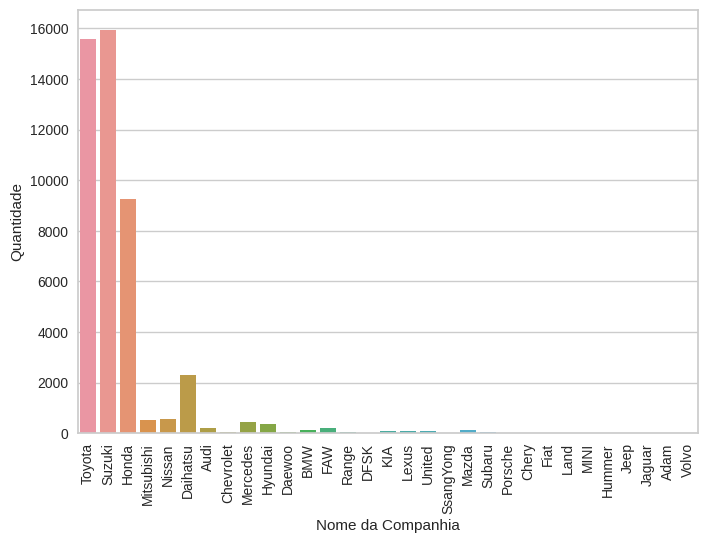

In [ ]:
ax = sns.countplot(x = 'Company Name', data = dados)
ax.set_ylabel('Quantidade')
ax.set_xlabel('Nome da Companhia')
ax.tick_params(axis='x', rotation=90)

Estamos vendo que existe uma grande diferença entre os nomes das companhias. Talvez seja uma boa opção dar um drop nesta coluna, ao invés de transformá-la.

Text(0.5, 1.0, 'Distribuição de Frequência')

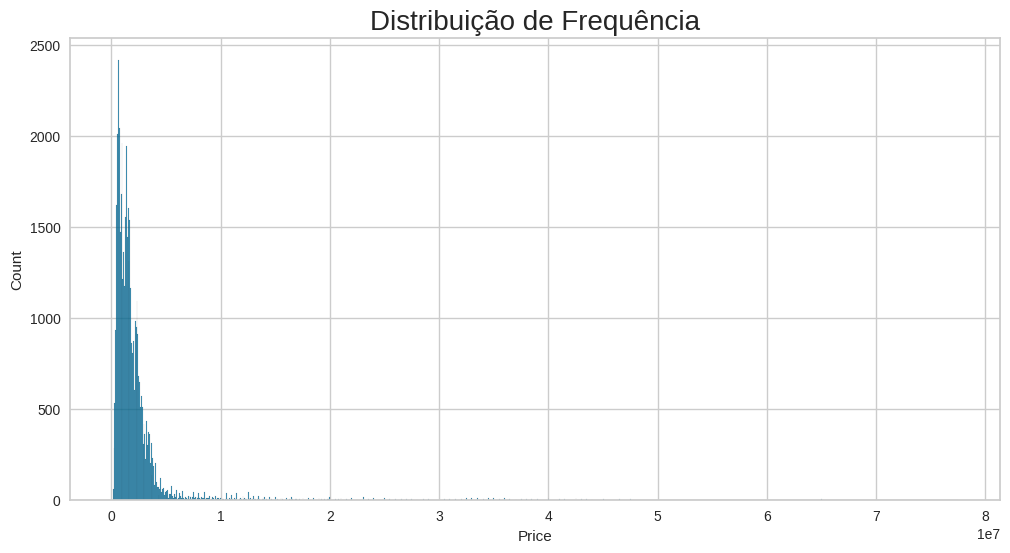

In [ ]:
ax = sns.histplot(dados['Price'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência', fontsize=20)

Text(0.5, 1.0, 'Distribuição de Frequência')

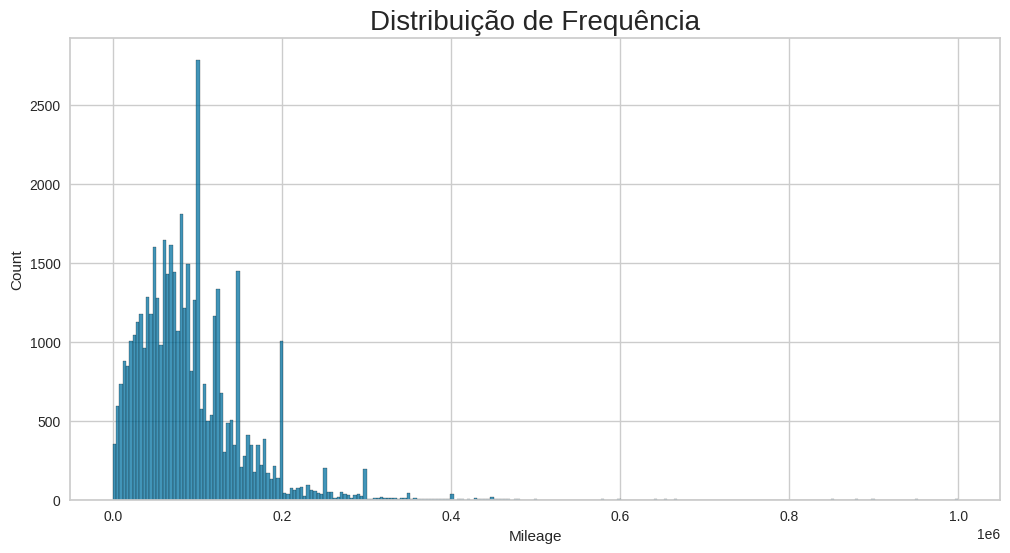

In [ ]:
ax = sns.histplot(dados['Mileage'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência', fontsize=20)

Text(0.5, 1.0, 'Distribuição de Frequência')

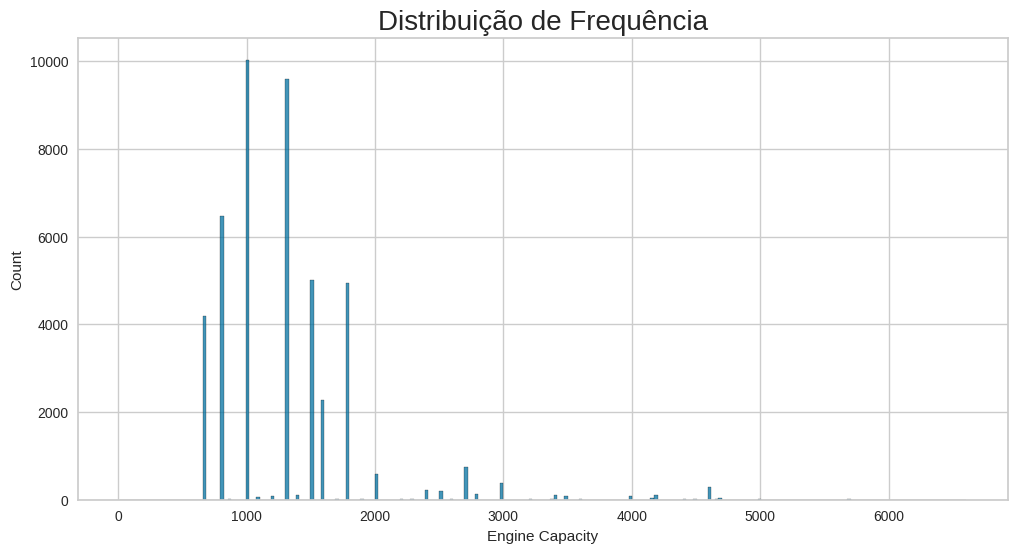

In [ ]:
ax = sns.histplot(dados['Engine Capacity'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência', fontsize=20)

A nossa variável dependente, o preço, possui uma assimetria à direita. É necessário fazer uma transformação na variável preço. Uma transformação logaritmica.

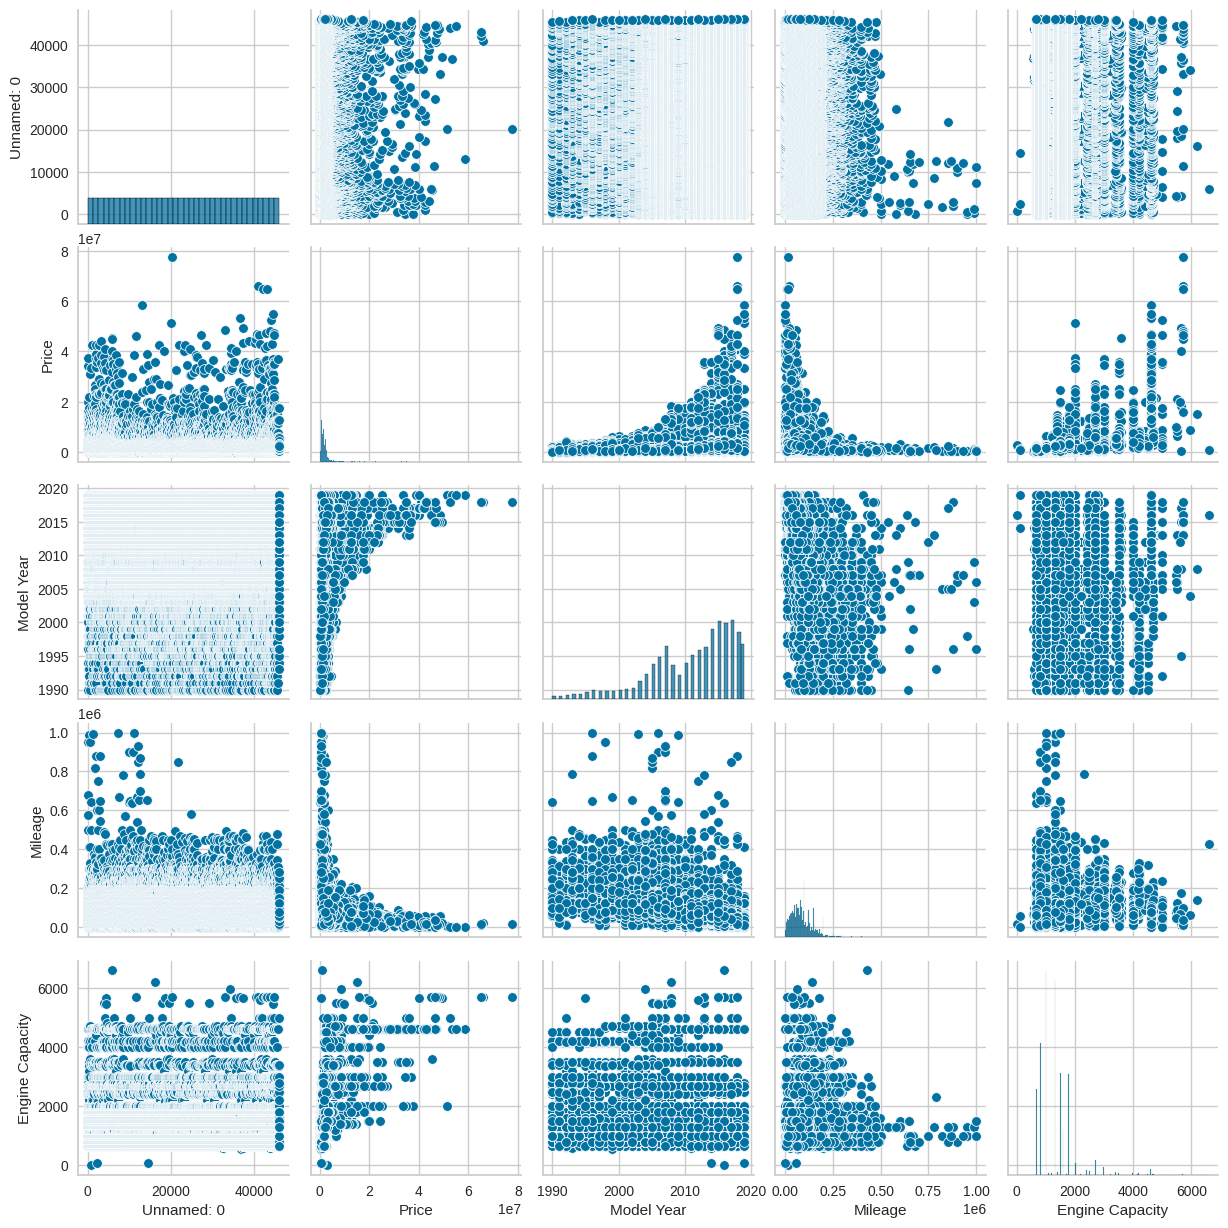

In [ ]:
ax = sns.pairplot(dados)

# Trabalhando com o dataframe

Darei um drop nas colunas:

Unnamed: 0, pois é apenas um identificador.

Company Name: É o nome da companhia, mas existe um grande desbalanceamento nos dados.

Model Name: É o modelo do carro, mas existe um grande desbalanceamento nos dados.

Color: É apenas a cor dos carros.

Location: É apenas onde os carros estão sendo vendidos.



In [ ]:
dados_limpos = dados.drop(['Unnamed: 0', 'Company Name', 'Model Name', 'Location', 'Color'], axis = 1)
dados_limpos.head()

,Price,Model Year,Mileage,Engine Type,Engine Capacity,Assembly,Body Type,Transmission Type,Registration Status
0,2385000.0,2017,9869.0,Petrol,1000.0,Imported,Hatchback,Automatic,Un-Registered
1,111000.0,2019,11111.0,Petrol,1300.0,Local,Sedan,Automatic,Registered
2,1530000.0,2019,17500.0,Petrol,660.0,Local,Hatchback,Automatic,Un-Registered
3,1650000.0,2019,9600.0,Petrol,660.0,Local,Hatchback,Manual,Registered
4,1435000.0,2010,120000.0,Petrol,1300.0,Local,Sedan,Manual,Registered


In [ ]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                46022 non-null  float64
 1   Model Year           46022 non-null  int64  
 2   Mileage              46022 non-null  float64
 3   Engine Type          46022 non-null  object 
 4   Engine Capacity      46022 non-null  float64
 5   Assembly             46022 non-null  object 
 6   Body Type            46022 non-null  object 
 7   Transmission Type    46022 non-null  object 
 8   Registration Status  46022 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.2+ MB


In [ ]:
correlacao = dados_limpos.corr()

<ipython-input-115-785c08d1fe53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_limpos.corr()


In [ ]:
# from sklearn.preprocessing import FunctionTransformer

transformacao = FunctionTransformer(func=np.log1p, validate=True)

variaveis_numericas = dados_limpos.select_dtypes(include=[np.number]).columns
dados_transformados = transformacao.transform(dados_limpos[variaveis_numericas])

dados_transformados = pd.DataFrame(dados_transformados, columns=variaveis_numericas)

dados_transformados.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,Price,Model Year,Mileage,Engine Capacity
0,14.684710,7.609862,9.197255,6.908755
1,11.617294,7.610853,9.315781,7.170888
2,14.240779,7.610853,9.770013,6.493754
3,14.316286,7.610853,9.169623,6.493754
4,14.176676,7.606387,11.695255,7.170888


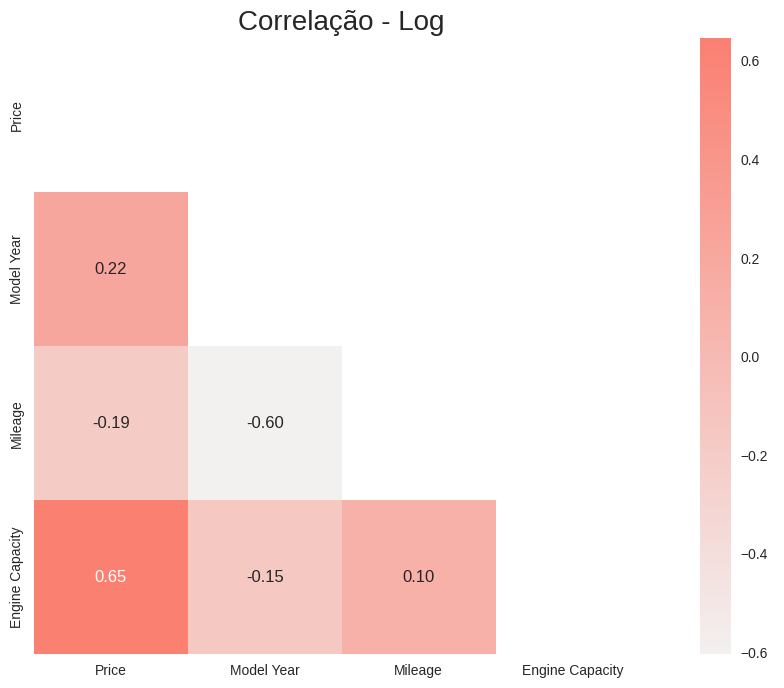

In [ ]:
cores = sns.color_palette('light:salmon', as_cmap = True)
correlacao_transformado = dados_transformados.corr()
mask = np.zeros_like(correlacao_transformado)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
  f, ax = plt.subplots(figsize = (13, 8))
  ax = sns.heatmap(correlacao, cmap = cores, mask = mask, square = True, fmt = '.2f', annot = True)
  ax.set_title('Correlação - Log', fontsize = 20)

Text(0.5, 0, 'Preço dos carros em Log')

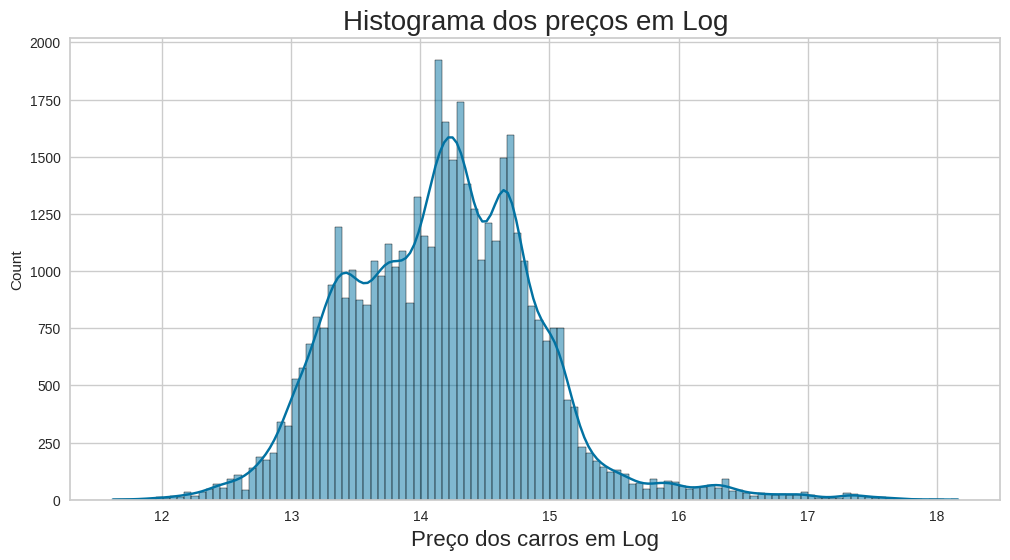

In [ ]:
ax = sns.histplot(dados_transformados['Price'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma dos preços em Log', fontsize=20)
ax.set_xlabel('Preço dos carros em Log', fontsize=16)

In [ ]:
variaveis_categoricas = dados_limpos.select_dtypes(include = ['object']).columns
variaveis_categoricas

Index(['Engine Type', 'Assembly', 'Body Type', 'Transmission Type',
       'Registration Status'],
      dtype='object')

In [ ]:
dados_dummies = pd.get_dummies(dados_limpos[variaveis_categoricas])
dados_dummies.head()

,Engine Type_Diesel,Engine Type_Hybrid,Engine Type_Petrol,Assembly_Imported,Assembly_Local,Body Type_Cross Over,Body Type_Hatchback,Body Type_Mini Van,Body Type_SUV,Body Type_Sedan,Body Type_Van,Transmission Type_Automatic,Transmission Type_Manual,Registration Status_Registered,Registration Status_Un-Registered
0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0
2,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
3,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0
4,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0


In [ ]:
dados_dummies.columns

Index(['Engine Type_Diesel', 'Engine Type_Hybrid', 'Engine Type_Petrol',
       'Assembly_Imported', 'Assembly_Local', 'Body Type_Cross Over',
       'Body Type_Hatchback', 'Body Type_Mini Van', 'Body Type_SUV',
       'Body Type_Sedan', 'Body Type_Van', 'Transmission Type_Automatic',
       'Transmission Type_Manual', 'Registration Status_Registered',
       'Registration Status_Un-Registered'],
      dtype='object')

In [ ]:
dados_limpos2 = pd.concat([dados_dummies, dados_transformados], axis = 1)

In [ ]:
df_final = dados_limpos2
df_final.head()

,Engine Type_Diesel,Engine Type_Hybrid,Engine Type_Petrol,Assembly_Imported,Assembly_Local,Body Type_Cross Over,Body Type_Hatchback,Body Type_Mini Van,Body Type_SUV,Body Type_Sedan,Body Type_Van,Transmission Type_Automatic,Transmission Type_Manual,Registration Status_Registered,Registration Status_Un-Registered,Price,Model Year,Mileage,Engine Capacity
0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,14.684710,7.609862,9.197255,6.908755
1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,11.617294,7.610853,9.315781,7.170888
2,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,14.240779,7.610853,9.770013,6.493754
3,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,14.316286,7.610853,9.169623,6.493754
4,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,14.176676,7.606387,11.695255,7.170888


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Engine Type_Diesel                 46022 non-null  uint8  
 1   Engine Type_Hybrid                 46022 non-null  uint8  
 2   Engine Type_Petrol                 46022 non-null  uint8  
 3   Assembly_Imported                  46022 non-null  uint8  
 4   Assembly_Local                     46022 non-null  uint8  
 5   Body Type_Cross Over               46022 non-null  uint8  
 6   Body Type_Hatchback                46022 non-null  uint8  
 7   Body Type_Mini Van                 46022 non-null  uint8  
 8   Body Type_SUV                      46022 non-null  uint8  
 9   Body Type_Sedan                    46022 non-null  uint8  
 10  Body Type_Van                      46022 non-null  uint8  
 11  Transmission Type_Automatic        46022 non-null  uin

# SEPARAÇÃO EM TREINO E TESTE

In [ ]:
# from sklearn.model_selection import train_test_split

X = df_final.drop('Price', axis = 1)
y = df_final['Price'].copy()

In [ ]:
X.head(2)

,Engine Type_Diesel,Engine Type_Hybrid,Engine Type_Petrol,Assembly_Imported,Assembly_Local,Body Type_Cross Over,Body Type_Hatchback,Body Type_Mini Van,Body Type_SUV,Body Type_Sedan,Body Type_Van,Transmission Type_Automatic,Transmission Type_Manual,Registration Status_Registered,Registration Status_Un-Registered,Model Year,Mileage,Engine Capacity
0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,7.609862,9.197255,6.908755
1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,7.610853,9.315781,7.170888


In [ ]:
y.head(2)

0    14.684710
1    11.617294
Name: Price, dtype: float64

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Regressão Linear

In [ ]:
# from sklearn.linear_model import LinearRegression

reg_linear = LinearRegression()

reg_linear.fit(X_treino, y_treino)

LinearRegression()

In [ ]:
X_treino_para_predict = df_final.drop('Price', axis = 1)
y_treino_para_predict = df_final['Price'].copy()

dado_aleatorio = X_treino_para_predict.iloc[:3]
label_aleatorio = y_treino_para_predict.iloc[:3]

print('Predição: ', reg_linear.predict(X_treino_para_predict))
print('Labels: ', list(label_aleatorio))

Predição:  [14.7668457  14.9074707  14.15234375 ... 14.85351562 14.8840332
 14.58154297]
Labels:  [14.684710101591703, 11.6172944892629, 14.240778946963175]


In [ ]:
# from sklearn.model_selection import cross_val_score


scores = cross_val_score(reg_linear, X_treino, y_treino, scoring='r2', cv=5)
scores.mean()

0.901794314549978

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


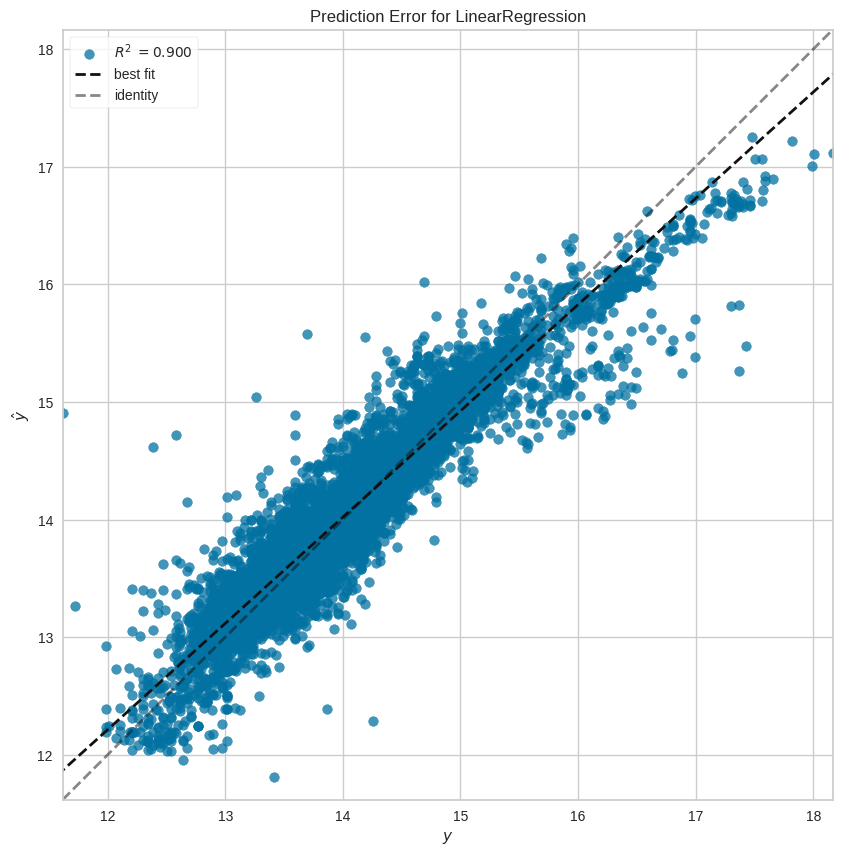

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize = (10, 10))
pev = PredictionError(reg_linear)
pev.fit(X_treino, y_treino)
pev.score(X_teste, y_teste)
pev.poof()

# Árvore de Decisão

In [ ]:
# from sklearn.tree import DecisionTreeRegressor

In [ ]:
arvore_reg = DecisionTreeRegressor(random_state = 42)

In [ ]:
arvore_reg.fit(X_treino, y_treino)

DecisionTreeRegressor(random_state=42)

In [ ]:
scores = cross_val_score(arvore_reg, X_treino, y_treino, scoring='r2', cv=5)
scores.mean()

0.9104362902712463

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


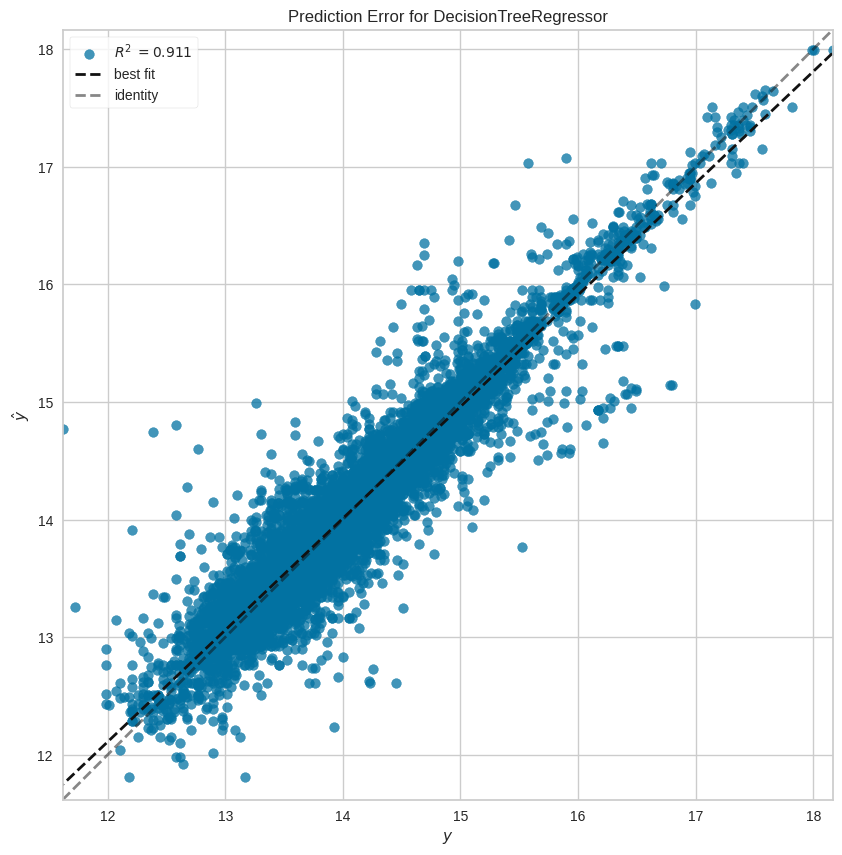

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize = (10, 10))
pev = PredictionError(arvore_reg)
pev.fit(X_treino, y_treino)
pev.score(X_teste, y_teste)
pev.poof()

# Floresta Aleatória

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

In [ ]:
fa_regressor = RandomForestRegressor(random_state = 42)

In [ ]:
fa_regressor.fit(X_treino, y_treino)

RandomForestRegressor(random_state=42)

In [ ]:
scores = cross_val_score(fa_regressor, X_treino, y_treino, scoring="r2", cv=5)
scores.mean()

0.9341571130921489

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


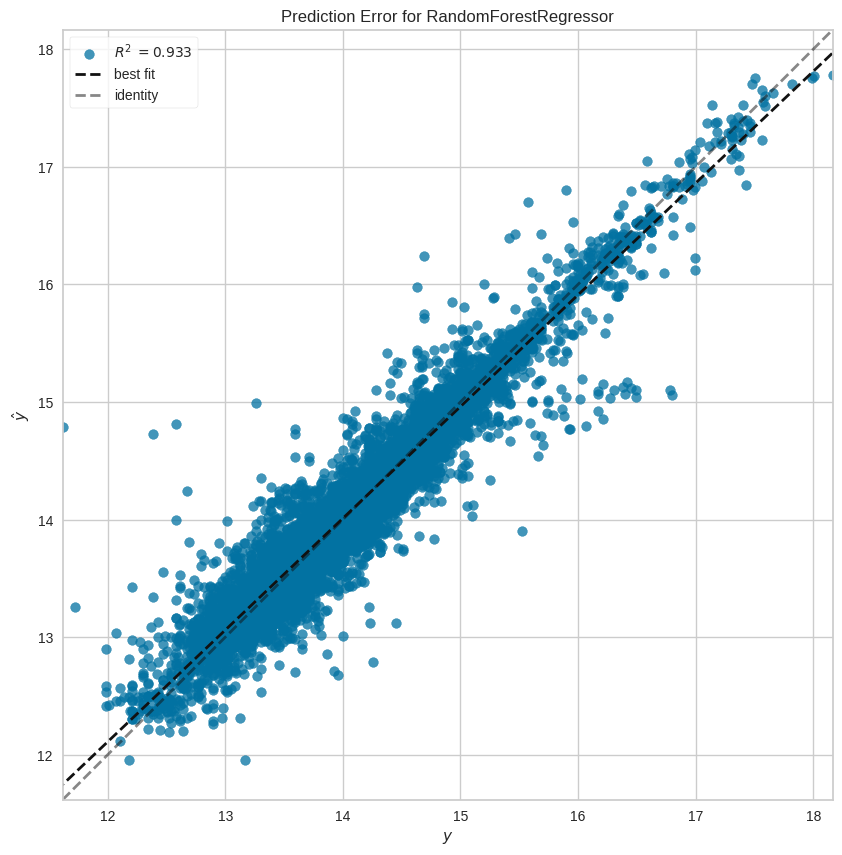

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize = (10, 10))
pev = PredictionError(fa_regressor)
pev.fit(X_treino, y_treino)
pev.score(X_teste, y_teste)
pev.poof()

# Comparando todas as métricas

In [ ]:
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def obter_metrica(modelo, X_teste, y_teste, nome):
    predict = modelo.predict(X_teste)
    df_metricas = pd.DataFrame({
        'R2': [r2_score(y_teste,predict)],
        'MSE': [mean_squared_error(y_teste, predict)],
        'MAE': [mean_absolute_error(y_teste, predict)]
    }, index=[nome])

    return df_metricas

def tabela_metricas(modelo_reg_linear, modelo_dt, modelo_rf, X_teste, y_teste):
    df_metricas_reg_lin = obter_metrica(modelo_reg_linear, X_teste, y_teste, 'Regressão Linear')
    df_metricas_arv = obter_metrica(modelo_dt, X_teste, y_teste, 'Árvore de Decisão Regressor')
    df_metricas_flo = obter_metrica(modelo_rf, X_teste, y_teste, 'Floresta Aleatória Regressor')

    return pd.concat([df_metricas_reg_lin.round(3), df_metricas_arv.round(3), df_metricas_flo.round(3)])

In [ ]:
tabela_metricas(reg_linear, arvore_reg, fa_regressor, X_teste, y_teste)

,R2,MSE,MAE
Regressão Linear,0.900,0.056,0.166
Árvore de Decisão Regressor,0.911,0.050,0.137
Floresta Aleatória Regressor,0.933,0.038,0.122


Floresta Aleatória foi o melhor modelo. Vamos otimizá-lo agora.

# Otimização de hiperparâmetros

Por se tratar de uma Floresta Aleatória, pode ser que seja demorado rodar modelos com muitos espaços de hiperparâmetros. Escolheremos então utilizar o RandomizedSearchCV ao invés do GridSearchCV, pois uma das vantagems do randomizedsearchcv é ser mais eficiente em termos computacionais.

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#seleção de hiperparâmetro
espaco_de_hiperparametros = {
  'n_estimators' : [50, 100, 150, 200],
  'max_depth' : [20, 25, 30],
  'min_samples_split' : [8, 10, 12],
  'min_samples_leaf' : [3, 4]
}

randomized_flo = RandomizedSearchCV(
    fa_regressor,
    espaco_de_hiperparametros,
    n_iter = 5,
    cv = 5,
    scoring = 'r2',
    n_jobs = -1,
    random_state = 42
)

In [ ]:
flo_randomized = randomized_flo.fit(X_treino, y_treino)

In [ ]:
flo_randomized.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 20}

In [ ]:
flo_randomized.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=150, random_state=42)

# Modelo final

In [ ]:
modelo_final = flo_randomized.best_estimator_

In [ ]:
predicao_final = modelo_final.predict(X_teste)

In [ ]:
df_metricas = pd.DataFrame({
        'R2': [r2_score(y_teste, predicao_final)],
        'MSE': [mean_squared_error(y_teste, predicao_final)],
        'MAE': [mean_absolute_error(y_teste, predicao_final)]},
         index = ['Floresta Aleatória Otimizada'])

df_metricas

,R2,MSE,MAE
Floresta Aleatória Otimizada,0.940475,0.033447,0.115473


# Simulador simples

In [ ]:
X.columns

Index(['Engine Type_Diesel', 'Engine Type_Hybrid', 'Engine Type_Petrol',
       'Assembly_Imported', 'Assembly_Local', 'Body Type_Cross Over',
       'Body Type_Hatchback', 'Body Type_Mini Van', 'Body Type_SUV',
       'Body Type_Sedan', 'Body Type_Van', 'Transmission Type_Automatic',
       'Transmission Type_Manual', 'Registration Status_Registered',
       'Registration Status_Un-Registered', 'Model Year', 'Mileage',
       'Engine Capacity'],
      dtype='object')

In [ ]:
carro_simulado = pd.DataFrame({'Engine Type_Diesel' : [1], 'Engine Type_Hybrid' : [0],
                               'Engine Type_Petrol' : [0], 'Assembly_Imported' : [1],
                               'Assembly_Local' : [0],  'Body Type_Cross Over' : [0],
       'Body Type_Hatchback' : [0], 'Body Type_Mini Van' : [0], 'Body Type_SUV' : [0],
       'Body Type_Sedan' : [1], 'Body Type_Van' : [0], 'Transmission Type_Automatic' : [1],
       'Transmission Type_Manual' : [0], 'Registration Status_Registered' : [1],
       'Registration Status_Un-Registered' : [0], 'Model Year' : [2019], 'Mileage' : [11111.0],
       'Engine Capacity' : [1300.0]})

carro_simulado

,Engine Type_Diesel,Engine Type_Hybrid,Engine Type_Petrol,Assembly_Imported,Assembly_Local,Body Type_Cross Over,Body Type_Hatchback,Body Type_Mini Van,Body Type_SUV,Body Type_Sedan,Body Type_Van,Transmission Type_Automatic,Transmission Type_Manual,Registration Status_Registered,Registration Status_Un-Registered,Model Year,Mileage,Engine Capacity
0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,2019,11111.0,1300.0


In [ ]:
variaveis_numericas = ['Model Year', 'Mileage', 'Engine Capacity']
carro_simulado[variaveis_numericas] = np.log1p(carro_simulado[variaveis_numericas])

In [ ]:
carro_simulado

,Engine Type_Diesel,Engine Type_Hybrid,Engine Type_Petrol,Assembly_Imported,Assembly_Local,Body Type_Cross Over,Body Type_Hatchback,Body Type_Mini Van,Body Type_SUV,Body Type_Sedan,Body Type_Van,Transmission Type_Automatic,Transmission Type_Manual,Registration Status_Registered,Registration Status_Un-Registered,Model Year,Mileage,Engine Capacity
0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,7.610853,9.315781,7.170888


In [ ]:
previsao_simulado = modelo_final.predict(carro_simulado)
previsao_simulado

array([14.80110072])

In [ ]:
np.expm1(previsao_simulado)

array([2679391.70627026])